In [0]:
# Imports
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, BatchNormalization
from keras.layers import Conv2D, MaxPooling2D

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
print(x_train.shape)
print(x_test.shape)

(50000, 32, 32, 3)
(10000, 32, 32, 3)


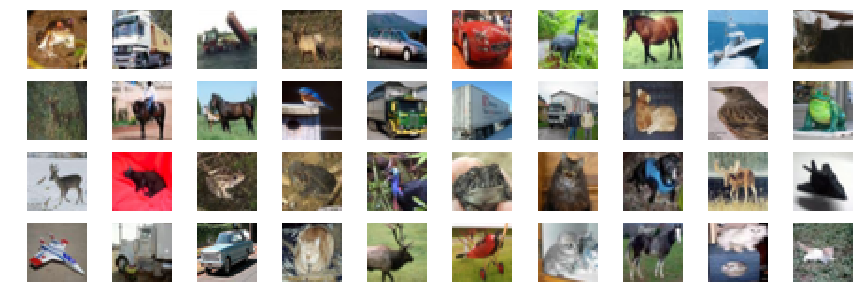

In [0]:
# Show a few samples
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))
for it_k in range(40):
    plt.subplot(4, 10, it_k+1)
    plt.imshow(x_train[it_k])
    plt.axis('off')
plt.show()

In [0]:
# Format labels
num_classes = 10
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train.shape)
print(y_test.shape)
print(y_train[:10])

(50000, 10)
(10000, 10)
[[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]]


In [0]:
# Create NN
#model = Sequential()

#model.summary()

In [0]:
# Optimization parameters
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [0]:
# Training
batch_size = ?
num_epochs = ?
model.fit(x_train, y_train, batch_size=batch_size, epochs=num_epochs, verbose=1, validation_data=(x_test, y_test))

In [0]:
# Test on more data (same as val in this example)
score = model.evaluate(x_test, y_test, verbose=0)
print(score)

[0.02749534252323774, 0.9923]


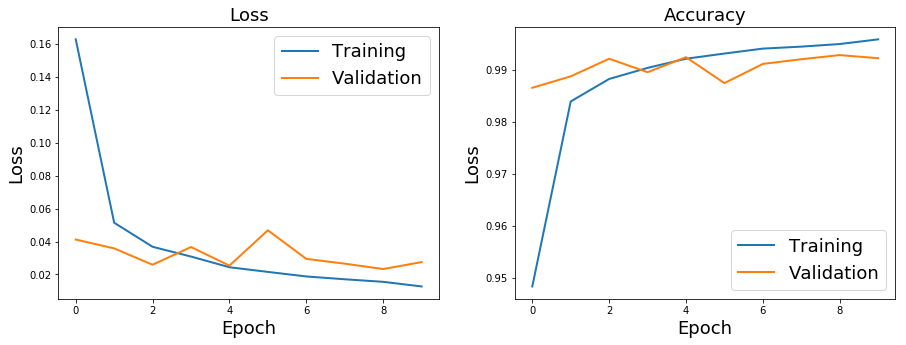

In [0]:
# Plot training loss
import matplotlib.pyplot as plt
plt.figure(figsize=(15, 5))

plt.subplot(1, 2, 1)
plt.plot(model.history.history['loss'], label='Training', linewidth=2)
plt.plot(model.history.history['val_loss'], label='Validation', linewidth=2)
plt.legend(fontsize=18)
plt.title('Loss', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.subplot(1, 2, 2)
plt.plot(model.history.history['acc'], label='Training', linewidth=2)
plt.plot(model.history.history['val_acc'], label='Validation', linewidth=2)
plt.legend(fontsize=18)
plt.title('Accuracy', fontsize=18)
plt.xlabel('Epoch', fontsize=18)
plt.ylabel('Loss', fontsize=18)
plt.show()

In [0]:
import numpy as np
# Predict classes for test set
y_test_pred = model.predict(x_test).round()
y_test_pred = np.argmax(y_test_pred, axis=1)
y_test = np.argmax(y_test, axis=1)

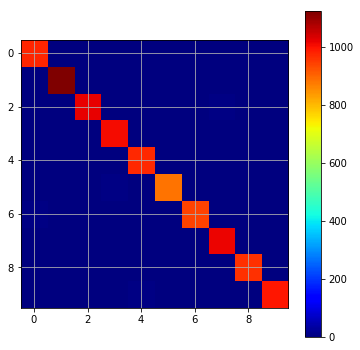

In [0]:
# Confussion Matrix
from sklearn.metrics import confusion_matrix
Conf_Mat = confusion_matrix(y_test, y_test_pred)
plt.figure(figsize=(6, 6))
plt.imshow(Conf_Mat, cmap='jet')
plt.grid()
plt.colorbar()
plt.show()

(7, 7, 1, 32)
(32,)


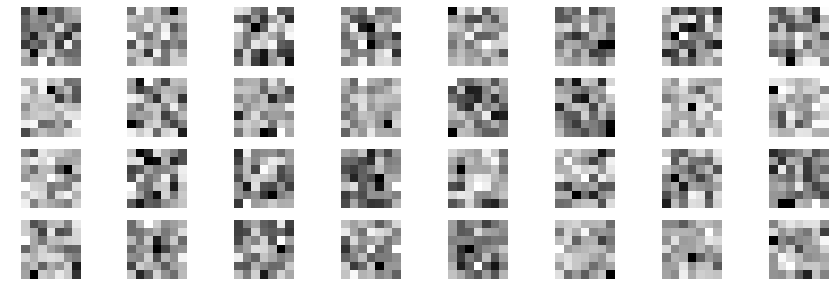

In [0]:
# Get kernels
Omega = model.layers[0].get_weights()
print(Omega[0].shape)
print(Omega[1].shape)
Kernels = Omega[0].reshape(Omega[0].shape[3], Omega[0].shape[0], Omega[0].shape[1])

# Visualize them
plt.figure(figsize=(15, 5))
for it_k, k in enumerate(Kernels):
    plt.subplot(4, 8, it_k+1)
    plt.imshow(k, cmap='gray')
    plt.axis('off')
plt.show()

(3, 3, 32, 64)
(64,)


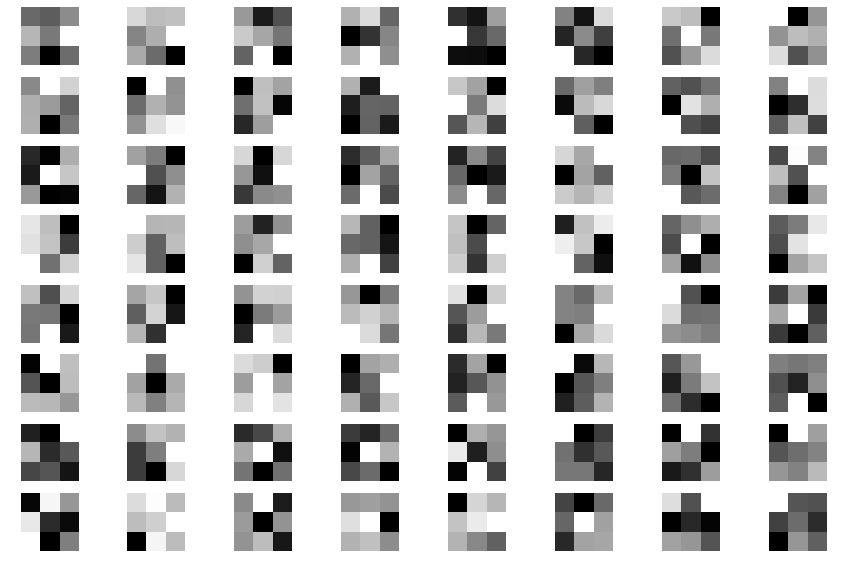

In [0]:
# Get kernels
Omega = model.layers[4].get_weights()
print(Omega[0].shape)
print(Omega[1].shape)
Kernels = Omega[0].reshape(Omega[0].shape[3], Omega[0].shape[0], Omega[0].shape[1], -1)

# Visualize them
plt.figure(figsize=(15, 10))
for it_k, k in enumerate(Kernels):
    plt.subplot(8, 8, it_k+1)
    plt.imshow(k.mean(axis=2), cmap='gray')
    plt.axis('off')
plt.show()

In [0]:
# Submodel for visualizing intermediate output
from keras.models import Model
mod1 = Model(model.input, model.layers[1].output)
mod1.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18_input (InputLayer) (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        1600      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
Total params: 1,600
Trainable params: 1,600
Non-trainable params: 0
_________________________________________________________________


(14, 14, 32)


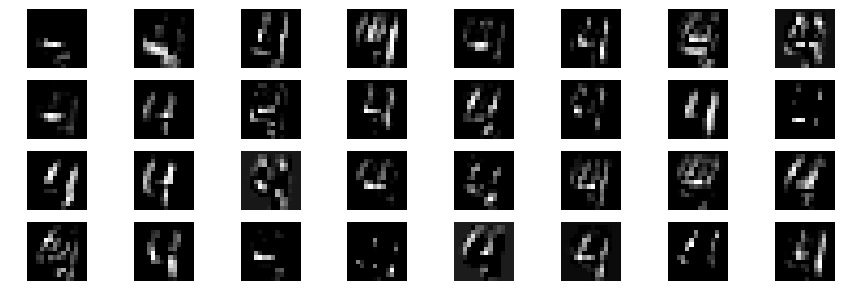

In [0]:
# Predict and reshape
interm_out = mod1.predict(x_test[4].reshape(1, x_test.shape[1], x_test.shape[2], x_test.shape[3]))
interm_out = interm_out.reshape(interm_out.shape[1], interm_out.shape[2], interm_out.shape[3])
print(interm_out.shape)

# Visualize them
plt.figure(figsize=(15, 5))
for it_k in range(32):
    plt.subplot(4, 8, it_k+1)
    plt.imshow(interm_out[:,:,it_k], cmap='gray')
    plt.axis('off')
plt.show()

In [0]:
# Submodel for visualizing intermediate output
from keras.models import Model
mod2 = Model(model.input, model.layers[4].output)
mod2.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18_input (InputLayer) (None, 28, 28, 1)         0         
_________________________________________________________________
conv2d_18 (Conv2D)           (None, 28, 28, 32)        1600      
_________________________________________________________________
max_pooling2d_11 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 14, 14, 32)        9248      
_________________________________________________________________
max_pooling2d_12 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 5, 5, 64)          18496     
Total params: 29,344
Trainable params: 29,344
Non-trainable params: 0
_________________________________________________________________


(5, 5, 64)


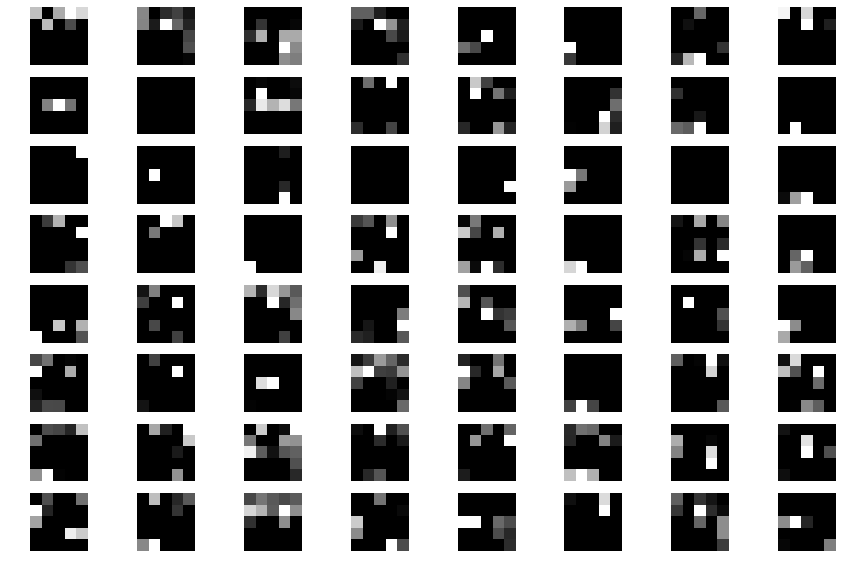

In [0]:
# Predict and reshape
interm_out = mod2.predict(x_test[4].reshape(1, x_test.shape[1], x_test.shape[2], x_test.shape[3]))
interm_out = interm_out.reshape(interm_out.shape[1], interm_out.shape[2], interm_out.shape[3])
print(interm_out.shape)

# Visualize them
plt.figure(figsize=(15, 10))
for it_k in range(64):
    plt.subplot(8, 8, it_k+1)
    plt.imshow(interm_out[:,:,it_k], cmap='gray')
    plt.axis('off')
plt.show()

In [0]:
# Save model
model.save('mymodel.h5')

In [ ]:
# Example: Load a model from disk
from keras.models import load_model
model = load_model('mymodel.h5')
# After this part, you can used the loaded model for prediction or to continue training